# Objective
A web-based product which can indentify a tweet as speech hate (Ras or Agama) or netral

### Data Statistics
1. Unique Values in labels
2. Tweet length
3. --
4. --
5. --

### Pre-Processing
1. Data Cleaning:
	- Missing Values, 
	- Duplicates, 
	- Outliers (if relevant)
	- Other Anomalies
2. Text Cleaning:
	- Punctuation
	- Numbers
	- Non alpha-numeric characters (if not relevant)
	- Emojis (if exists)
	- URLs and HTML tags (if exists)
	- Removing stopwords
3. Tokenization (word-tokenization splitting based on space)
4. Text normalization (stemming and lemmazation)

### Words Weighting
1. Bag of words
2. TF-IDF

### Modelling
1. Train test split
2. Naive Bayes
3. KNN


# Data Statistics

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('./dataset/Speech_Dataset.csv', encoding='latin1', sep=';', header=None) 
data.head(3)

,0,1,2
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama


In [3]:
data.columns = ['username', 'tweet', 'label'] 

In [4]:
print(f'Data rows: {data.shape[0]}')

Data rows: 2128


In [5]:
print(f'Data columns: {data.shape[1]}')
print(data.columns.tolist())

Data columns: 3
['username', 'tweet', 'label']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2001 non-null   object
 1   tweet     2001 non-null   object
 2   label     2000 non-null   object
dtypes: object(3)
memory usage: 50.0+ KB


In [7]:
data.describe()

,username,tweet,label
count,2001,2001,2000
unique,1717,1939,3
top,DodiAsyikin,IKN Potret Kemajuan,Netral
freq,7,7,836


In [8]:
labels = data['label'].unique().tolist()
labels

['Netral', 'Ras', 'Agama', nan]

In [9]:
data.head(3)

,username,tweet,label
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama


### checking missing values

In [10]:
data.isna().sum()

username    127
tweet       127
label       128
dtype: int64

In [11]:
len(data[data.isna().all(axis=1)])

127

In [12]:
len(data[data.isna().any(axis=1)])

128

In [13]:
data[data.isna().any(axis=1)]

,username,tweet,label
336,NaN,NaN,NaN
337,NaN,NaN,NaN
922,NaN,NaN,NaN
1738,Sakuravssosuke,IKN Potret Kemajuan,NaN
2004,NaN,NaN,NaN
...,...,...,...
2123,NaN,NaN,NaN
2124,NaN,NaN,NaN
2125,NaN,NaN,NaN
2126,NaN,NaN,NaN


there are 127 rows with all NaN values in the cells, and one row with at least one NaN values, (it's in the label)

In [14]:
print(f'Duplicated Values: {data.duplicated().sum()}')

Duplicated Values: 169


In [15]:
print(f'Duplicated Usernames: {data.username.duplicated().sum()}')

Duplicated Usernames: 410


In [16]:
print(f'Duplicated Tweets: {data.tweet.duplicated().sum()}')

Duplicated Tweets: 188


In [17]:
data.loc[data.duplicated() == True]

,username,tweet,label
143,rowby_jr,"@VIVAcoid Sudahlah,Dia mnjabat sbg menteri saj...",Netral
144,idzharsyafawii,@banjarbase Agama jgn dijadikan tolak ukur lag...,Netral
337,NaN,NaN,NaN
398,w8mt_kL89_j3x66,Ini contoh Islam yg ga bener + contoh kristen ...,Agama
452,focuseyelove,Ka'bah islam anjing edan. Islam agama salah. h...,Agama
...,...,...,...
2123,NaN,NaN,NaN
2124,NaN,NaN,NaN
2125,NaN,NaN,NaN
2126,NaN,NaN,NaN


In [18]:
data.loc[data.username.duplicated() == True]

,username,tweet,label
24,newsutdofficial,Paul Pogba tentang masuk Islam: ??ª?Saya pi...,Netral
90,Jejak_langkah25,Menteri Penerangan Muda Bangladesh Murad Hassa...,Agama
92,AcimAli1,@fadlizon Di larang agama org yg selalu berpra...,Netral
99,dedensujana,@KompasTV Dinodai oleh preman berkedok agama d...,Agama
100,your4everbestie,@CantiqpakekQ @scztai Gabut bngt anjir sampe b...,Agama
...,...,...,...
2123,NaN,NaN,NaN
2124,NaN,NaN,NaN
2125,NaN,NaN,NaN
2126,NaN,NaN,NaN


In [19]:
data.loc[data.tweet.duplicated() == True]

,username,tweet,label
143,rowby_jr,"@VIVAcoid Sudahlah,Dia mnjabat sbg menteri saj...",Netral
144,idzharsyafawii,@banjarbase Agama jgn dijadikan tolak ukur lag...,Netral
269,ardrabyasa,@yonkpaws Jelek klodia ????????,Ras
337,NaN,NaN,NaN
387,bampchr,gua kok ngerekam suara gue jelek amat anjir bi...,Agama
...,...,...,...
2123,NaN,NaN,NaN
2124,NaN,NaN,NaN
2125,NaN,NaN,NaN
2126,NaN,NaN,NaN


In [20]:
print('Username Frequency Appearence')
data['username'].value_counts()

Username Frequency Appearence


username
DodiAsyikin      7
novitadewe       6
dedisutisna42    6
PiruHumas        5
CakCilik         5
                ..
pras41407973     1
maniscekalii     1
AbuFajri_        1
emerhafiz        1
GumGum76         1
Name: count, Length: 1717, dtype: int64

In [21]:
def plot_pie(title: str, values, labels):
	fig, ax = plt.subplots()
	plt.title(title)
	ax.pie(values, labels=labels, autopct='%2.2f%%', startangle=90)
	plt.show()

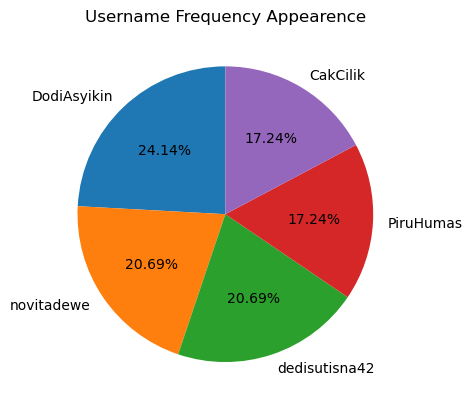

In [22]:
usernames_frequency = data['username'].value_counts().head()
plot_pie('Username Frequency Appearence', usernames_frequency, usernames_frequency.index)

In [23]:
print('Labels Frequency')
data['label'].value_counts()

Labels Frequency


label
Netral    836
Ras       601
Agama     563
Name: count, dtype: int64

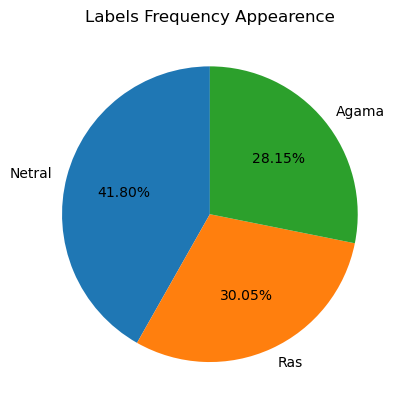

In [24]:
labels_frequency = data['label'].value_counts()
plot_pie('Labels Frequency Appearence', labels_frequency, labels_frequency.index)

-  
- Distribution labels in pie chart and percentage
- Top 5 username


In [25]:
print('Top 5 Tweets')
data['tweet'].value_counts().head()

Top 5 Tweets


tweet
IKN Potret Kemajuan                                                                                                                                   7
@apoycuy Tokoh agama di Papua kecam penyerangan KSTP ke pendeta dan ustad. IKN Potret Kemajuan                                                        3
gausah senyum kau didepan ku kntl, jelek kau babi https://t.co/oG18gZv3G8                                                                             3
@GeldaSMonika @onecigaraday @Puspen_PKI Jawabannya tidak, tapi kalo asumsi mbaknya ??hanya? orang papua yang diinjak?? https://t.co/ndXmXl3bld    3
Yang jelek + miskin udah pasti bukan Kristen , Tapi yang cantik,pinter,jago nuyanyi,Cino jowo jago masak,Kaya, Udah??ª?? https://t.co/OCiEYgamq0    3
Name: count, dtype: int64

/opt/anaconda3/envs/newKernel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/newKernel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/newKernel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 155 (\x9b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


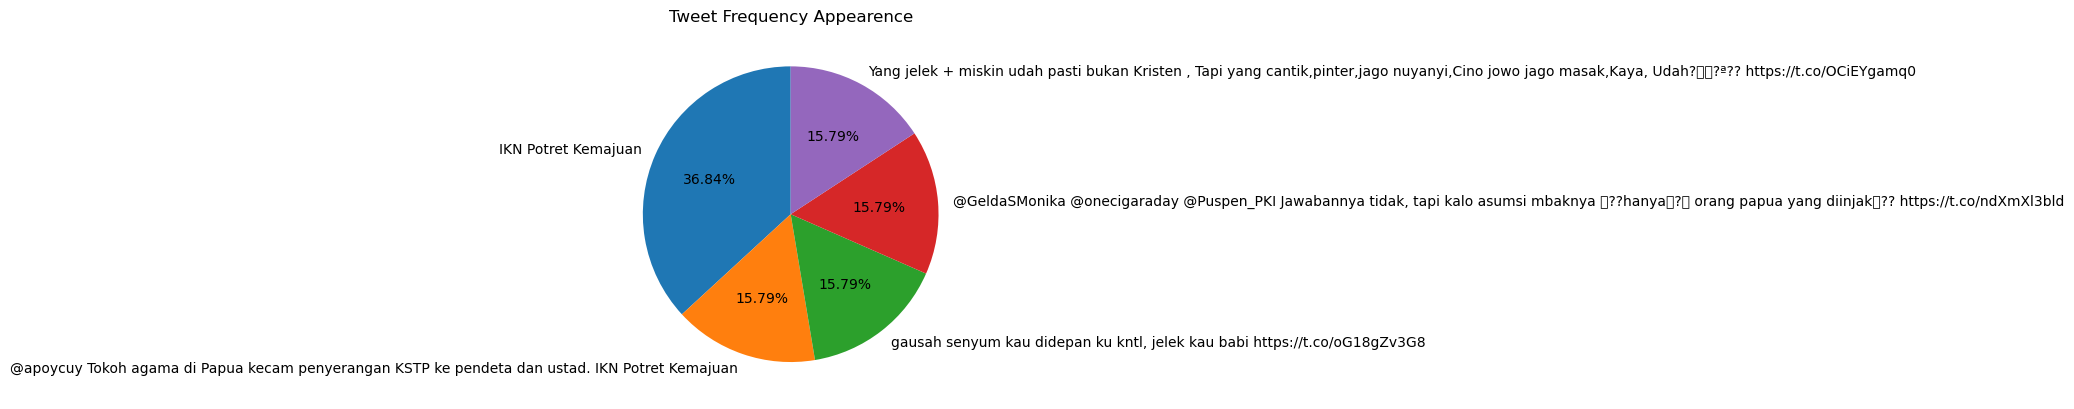

In [26]:
tweets_frequency = data['tweet'].value_counts().head()
plot_pie('Tweet Frequency Appearence', tweets_frequency, tweets_frequency.index)

In [27]:
labels_count_by_username = data.groupby(['username','label']).agg(['count']).reset_index().sort_values(by=('tweet','count'),ascending=False)
labels_count_by_username.head()

,username,label,tweet
,,,count
906,defany20,Netral,5
528,SandiPratiwiee,Netral,5
1274,liknovvskz,Netral,4
164,DionisioTerrero,Ras,4
904,dedisutisna42,Netral,4


In [28]:
for usr in usernames_frequency.index:
	print('\n')
	print(labels_count_by_username[labels_count_by_username['username'] == usr])



        username   label tweet
                         count
171  DodiAsyikin  Netral     4
172  DodiAsyikin     Ras     3


        username   label tweet
                         count
1431  novitadewe  Netral     3
1432  novitadewe     Ras     3


          username   label tweet
                           count
904  dedisutisna42  Netral     4
905  dedisutisna42     Ras     2


      username   label tweet
                       count
480  PiruHumas   Agama     3
481  PiruHumas  Netral     2


     username   label tweet
                      count
115  CakCilik  Netral     4
116  CakCilik     Ras     1


# Pre-Processing
1. Data Cleaning:
	- Missing Values, 
	- Duplicates, 
	- Outliers (if relevant)
	- Other Anomalies
2. Text Cleaning:
	- Punctuation
	- Numbers
	- Non alpha-numeric characters (if not relevant)
	- Emojis (if exists)
	- URLs and HTML tags (if exists)
	- visualizing stopwords
	- Removing stopwords
3. Tokenization (word-tokenization splitting based on space)
4. Text normalization (stemming and lemmazation)
- visualizing stemming/lemmatization
- visualizing top words based on stemming/lemmatization and labels
- wordclouds
5. TF IDF


Missing values: removing rows with all or any NaN

In [29]:
data.dropna(inplace=True)

Duplicates: removing all duplicates

In [30]:
data.drop_duplicates(inplace=True)
print(f'Total data rows after cleansing: {data.shape[0]}')

Total data rows after cleansing: 1957


remove duplicated tweet

In [31]:
data = data[~data['tweet'].duplicated()]

In [32]:
data['tweet'].duplicated().sum()

0

In [33]:
print(f'Total data rows after cleansing: {data.shape[0]}')

Total data rows after cleansing: 1939


Visualize Data After Data Cleansing

Labels Frequency After Cleansing
label
Netral    817
Ras       584
Agama     538
Name: count, dtype: int64


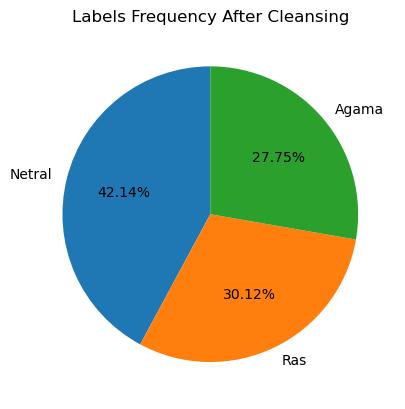

In [34]:
labels_frequency = data['label'].value_counts()
print('Labels Frequency After Cleansing')
print(labels_frequency)
plot_pie('Labels Frequency After Cleansing', labels_frequency, labels_frequency.index)

## visualizing word length, punctuations, digits, urls


In [35]:
data['length'] = data['tweet'].apply(lambda x: len(x.split()))
data.head()

,username,tweet,label,length
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral,21
1,__succiduous,Udah jelek brengsek pula,Ras,4
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama,17
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras,18
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama,8


In [36]:
tweet_length_mean = data.length.mean()
print(f'Average word length: {tweet_length_mean:.2f}')
print(f'Total tweets below word length: {len(data[data.length < tweet_length_mean])}')
print(f'Total tweet above word length: {len(data[data.length > tweet_length_mean])}')


Average word length: 13.90
Total tweets below word length: 847
Total tweet above word length: 1092


In [37]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def punctuations_in_tweet(data):
	counter = 0
	for i in set(data):
		if i in punctuation:
			counter += data.count(i)
	return counter

data['punctuation'] = data['tweet'].apply(punctuations_in_tweet)
data.head()

,username,tweet,label,length,punctuation
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral,21,12
1,__succiduous,Udah jelek brengsek pula,Ras,4,0
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama,17,18
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras,18,16
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama,8,1


In [39]:
data['urls'] =  data['tweet'].str.count(r'\bhttps://')
print(data['urls'].value_counts())
data.head()

urls
0    1083
1     851
2       5
Name: count, dtype: int64


,username,tweet,label,length,punctuation,urls
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral,21,12,1
1,__succiduous,Udah jelek brengsek pula,Ras,4,0,0
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama,17,18,1
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras,18,16,1
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama,8,1,0


In [40]:
def plot_hist(title:str, values, xlabel, ylabel):
	fig, ax = plt.subplots()
	plt.title(title)
	ax.hist(values)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.show()

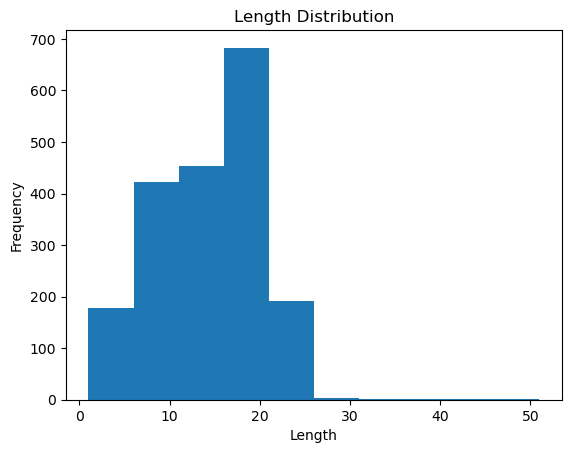

In [41]:
plot_hist('Length Distribution', data['length'].values, 'Length', 'Frequency')

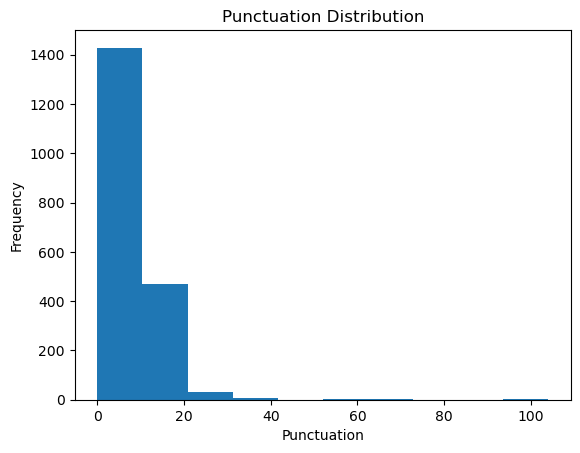

In [42]:
plot_hist('Punctuation Distribution', data['punctuation'].values, 'Punctuation', 'Frequency')

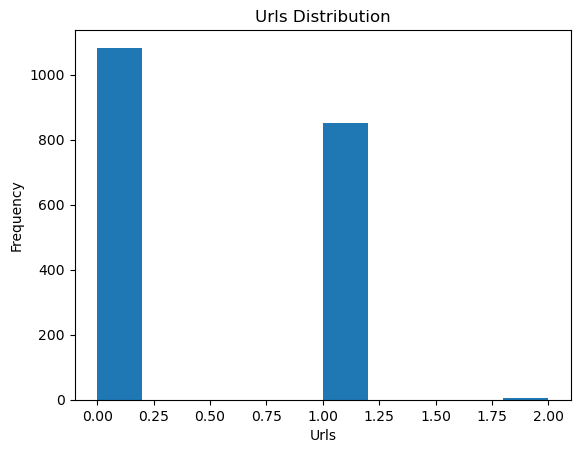

In [43]:
plot_hist('Urls Distribution', data['urls'].values, 'Urls', 'Frequency')

## word length, punctuations, urls by labels and usernames

In [44]:
print('Total and mean length for each label')
data.groupby('label')['length'].agg(['sum','mean']).reset_index()

Total and mean length for each label


,label,sum,mean
0,Agama,7934,14.747212
1,Netral,11503,14.079559
2,Ras,7507,12.854452


In [45]:
print('Total and mean punctuation for each label')
data.groupby('label')['punctuation'].agg(['sum','mean']).reset_index()

Total and mean punctuation for each label


,label,sum,mean
0,Agama,4573,8.500000
1,Netral,6062,7.419829
2,Ras,3579,6.128425


In [46]:
print('Total and mean urls for each label')
data.groupby('label')['urls'].agg(['sum','mean']).reset_index()

Total and mean urls for each label


,label,sum,mean
0,Agama,266,0.494424
1,Netral,402,0.492044
2,Ras,193,0.330479


In [47]:
print('Total and mean length by usernames')
data.groupby('username')['length'].agg(['sum','mean']).reset_index().sort_values(by=['sum','mean'],ascending=False).head()

Total and mean length by usernames


,username,sum,mean
1364,novitadewe,100,16.666667
1324,nabilaprcl,87,17.400000
438,PKS_PondokGede,80,20.000000
493,SandiPratiwiee,79,15.800000
161,DodiAsyikin,78,11.142857


In [48]:
print('Total and mean punctuation by usernames')
data.groupby('username')['punctuation'].agg(['sum','mean']).reset_index().sort_values(by=['sum','mean'],ascending=False).head()

Total and mean punctuation by usernames


,username,sum,mean
1389,pa_kab_malang,104,104.00
1211,liknovvskz,99,24.75
855,defany20,69,13.80
1556,straykidslinow,66,22.00
1495,samberjiwo1,52,52.00


In [49]:
print('Total and mean urls by usernames')
data.groupby('username')['urls'].agg(['sum','mean']).reset_index().sort_values(by=['sum','mean'],ascending=False).head()

Total and mean urls by usernames


,username,sum,mean
1364,novitadewe,6,1.0
110,CakCilik,5,1.0
185,Fakhri_Glem,5,1.0
493,SandiPratiwiee,5,1.0
1324,nabilaprcl,5,1.0


## Text Normalization
- Username mentioned in tweet
- Punctuation
- Numbers
- Non alpha-numeric characters (if not relevant)
- Emojis (if exists)
- URLs and HTML tags (if exists)
- Removing stopwords

In [50]:
import re

def text_normalization(data):
	normalized = data.lower()
	normalized = re.sub(r'@\S+', '', normalized) #removing @user (which start with word or digit)
	normalized = re.sub('#', ' ', normalized) #removing hashtags & leave the topic only
	normalized = re.sub(r'https://\S+', '', normalized) #removing everything starting with https://
	normalized = re.sub('\n', '', normalized) #removing new lines
	normalized = re.sub(r'[^a-zA-Z]+', ' ', normalized) #removing everything except alpha 
	return normalized.strip()
	

In [51]:
text_normalization(data['tweet'].iloc[0])

'lingkunganmu keknya punya pemahaman kl anak punk tuh jelek y kesannya kok gitu agak capek ya emg liat o'

In [52]:
# applying the function to tweet
data['normed_tweet'] = data['tweet'].apply(text_normalization)
# lowercasing labels
data['label'] = data['label'].str.lower()
data = data.reset_index(drop=True)

since there are lots of words that are shorten, we're going to replace them, let's check all of the unique words first" 

In [53]:
words_set = set(word for tweet in data['normed_tweet'].str.split() for word in tweet)
print(f'All the unique words: {len(words_set)}') 

All the unique words: 6478


In [54]:
words_map = {word: word for word in words_set}

In [55]:
words_map["yg"] = "yang"
words_map['dgn'] = "dengan"
words_map['dg'] = "dengan"
words_map['belom'] = "belum"
words_map['blm'] = "belum"
words_map['blom'] = "belum"
words_map['jgn'] = "jangan"
words_map['tp'] = "tapi"
words_map['kl'] = "kalau"
words_map['klo'] = "kalau"
words_map['kalo'] = "kalau"
words_map['ampe'] = "sampai"
words_map['ama'] = "dengan"
words_map['sm'] = "sama"
words_map['mmg'] = "memang"
words_map['bs'] = "bisa"
words_map['sj'] = "saja"
words_map['td'] = "tadi"
words_map['gpp'] = "tidak apa-apa"
words_map['aq'] = "aku"
words_map['gua'] = "aku"
words_map['km'] = "kamu"
words_map['lo'] = "kamu"
words_map['lu'] = "kamu"
words_map['kau'] = "kamu"
words_map['gw'] = 'aku'
words_map['gue'] = 'aku'
words_map['ku'] = 'aku'
words_map['w'] = 'aku'
words_map['nggak'] = 'tidak'
words_map['ga'] = 'tidak'
words_map['gk'] = 'tidak'
words_map['ngga'] = 'tidak'
words_map['gak'] = 'tidak'
words_map['bgt'] = 'banget'
words_map['stts'] = 'status'
words_map['utk'] = 'untuk'
words_map['dr'] = 'dari'
words_map['pake'] = 'pakai'
words_map['tu'] = 'itu'
words_map['cina'] = 'china'
words_map['tkt'] = 'takut'
words_map['org'] = 'orang'
words_map['byk'] = 'banyak'
words_map['tdk'] = 'tidak'
words_map['kek'] = 'seperti'
words_map['keknya'] = 'sepertinya'
words_map['kyk'] = 'seperti'
words_map['sbg'] = 'sebagai'
words_map['ajg'] = 'anjing'
words_map['anj'] = 'anjing'
words_map['anjer'] = 'anjir'
words_map['emg'] = 'memang'
words_map['emang'] = 'memang'
words_map['mmg'] = 'memang'

In [56]:
words_map 

{'macai': 'macai',
 'dgn': 'dengan',
 'padahal': 'padahal',
 'akidah': 'akidah',
 'basarirsin': 'basarirsin',
 'ini': 'ini',
 'hehhh': 'hehhh',
 'navy': 'navy',
 'terus': 'terus',
 'menitikkan': 'menitikkan',
 'bener': 'bener',
 'dn': 'dn',
 'wjuliia': 'wjuliia',
 'kuala': 'kuala',
 'didandani': 'didandani',
 'ngecek': 'ngecek',
 'anyingggg': 'anyingggg',
 'khas': 'khas',
 'faham': 'faham',
 'bersin': 'bersin',
 'lokal': 'lokal',
 'la': 'la',
 'hny': 'hny',
 'duo': 'duo',
 'menyingkir': 'menyingkir',
 'kaosan': 'kaosan',
 'min': 'min',
 'ttp': 'ttp',
 'kesehatan': 'kesehatan',
 'lapisan': 'lapisan',
 'my': 'my',
 'kkb': 'kkb',
 'when': 'when',
 'sebel': 'sebel',
 'amiiinnn': 'amiiinnn',
 'krisis': 'krisis',
 'lagimuterin': 'lagimuterin',
 'muhammad': 'muhammad',
 'putus': 'putus',
 'masu': 'masu',
 'dosa': 'dosa',
 'panyakit': 'panyakit',
 'kpop': 'kpop',
 'kampus': 'kampus',
 'nolongin': 'nolongin',
 'kontennya': 'kontennya',
 'menag': 'menag',
 'gunanya': 'gunanya',
 'bakiak': 'bakia

let's replace the slang/shorten words into proper words

In [57]:
for i, tweet in enumerate(data['normed_tweet'].values.tolist()): 
    # i is index, tweet is the value based on the index
    words = tweet.split() # spliting the strings
    mapped = [str(words_map.get(word)) for word in words] 
    # check if the string is in the words map based on the key and doesn't have the value of 1, 
    # if the key has the value of 1 then return the original word

    data.at[i,'normed_tweet'] = ' '.join(mapped)
    # applying to all the index of the normed_tweet column


In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdulkodir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
data

,username,tweet,label,length,punctuation,urls,normed_tweet
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,netral,21,12,1,lingkunganmu sepertinya punya pemahaman kalau ...
1,__succiduous,Udah jelek brengsek pula,ras,4,0,0,udah jelek brengsek pula
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,agama,17,18,1,lucunya penghuni negeri ini selalu di hiasi da...
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",ras,18,16,1,yang jelek miskin udah pasti bukan kristen tap...
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,agama,8,1,0,mereka memanfaatkan kebodohan kadrun melalui b...
...,...,...,...,...,...,...,...
1934,Nogu79359563,@feidy_rm Sepertinya diundang..tpi sejauh rama...,netral,17,6,0,sepertinya diundang tpi sejauh ramalan dan pre...
1935,Gungun88,"Kurang Ajar memang orang CINA itu, sudah hidup...",ras,16,3,0,kurang ajar memang orang china itu sudah hidup...
1936,Bita44,Nah ini paham wahabi semakin merebak di sekita...,agama,22,3,0,nah ini paham wahabi semakin merebak di sekita...
1937,Angga21,"Kita hidup di negara pancasila, harus mengplem...",netral,22,3,0,kita hidup di negara pancasila harus mengpleme...


## Stopwords Visualization

In [60]:
stopwords_count = {word: 0 for word in stop_words}

In [61]:
# counting the stopwords that present in the tweet norm
for i, tweet in enumerate(data['normed_tweet'].values.tolist()):
	words = tweet.split()
	
	for word in words:
		if word in stop_words:
			stopwords_count[word] += 1

In [62]:
stopwords_count

{'satu': 24,
 'ditegaskan': 0,
 'dong': 9,
 'waktunya': 1,
 'seluruhnya': 0,
 'sekitarnya': 3,
 'padahal': 22,
 'walaupun': 4,
 'seketika': 0,
 'ini': 195,
 'panjang': 2,
 'bagi': 16,
 'berlalu': 0,
 'berlangsung': 0,
 'terus': 27,
 'naik': 4,
 'entah': 0,
 'mengingatkan': 3,
 'sesekali': 0,
 'bung': 3,
 'beri': 1,
 'berakhirnya': 0,
 'bisakah': 0,
 'hingga': 5,
 'terjadi': 9,
 'umumnya': 0,
 'balik': 10,
 'semuanya': 4,
 'mendatang': 1,
 'sebanyak': 1,
 'diperbuatnya': 0,
 'diucapkan': 0,
 'selama': 12,
 'teringat-ingat': 0,
 'bagaimanapun': 0,
 'bila': 12,
 'diperkirakan': 0,
 'jelas': 17,
 'manalagi': 0,
 'tengah': 19,
 'mengingat': 1,
 'sudah': 23,
 'dulu': 39,
 'dapat': 7,
 'diakhiri': 0,
 'berarti': 9,
 'sesuatunya': 0,
 'kinilah': 0,
 'saat': 12,
 'akulah': 0,
 'dimintai': 0,
 'kenapa': 27,
 'usah': 5,
 'diingat': 0,
 'kurang': 5,
 'menyiapkan': 0,
 'mengetahui': 1,
 'percuma': 1,
 'siapa': 15,
 'wahai': 2,
 'paling': 24,
 'memerlukan': 0,
 'asalkan': 0,
 'seingat': 0,
 'hal': 3

In [63]:
list_stop_words = list(stopwords_count.keys())
list_stop_words_count = list(stopwords_count.values())
stop_words_df = pd.DataFrame(zip(list_stop_words, list_stop_words_count), columns=['stop_words','count'])
stop_words_df = stop_words_df.sort_values('count', ascending=False).reset_index(drop=True)
top_stop_words_df = stop_words_df.head()
top_stop_words_df

,stop_words,count
0,yang,567
1,di,323
2,tidak,321
3,dan,296
4,aku,281


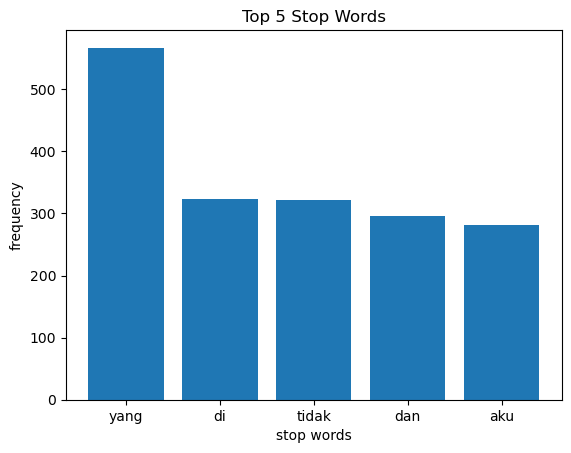

In [64]:
import matplotlib.pyplot as plt

def box_plot(title:str, xvalues, yvalues, xlabel, ylabel):
	fig, ax = plt.subplots()
	plt.title(title)
	ax.bar(x=xvalues, height=yvalues)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.show()

box_plot('Top 5 Stop Words', top_stop_words_df['stop_words'], top_stop_words_df['count'], 'stop words', 'frequency')

In [65]:
step_words_removed = list()

In [66]:
for i, tweet in enumerate(data['normed_tweet'].values.tolist()):
	words = tweet.split()
	step_words_removed = ' '.join([word for word in words if word not in list_stop_words])
	data.at[i, 'stop_words_removed'] = step_words_removed

In [67]:
data.head()

,username,tweet,label,length,punctuation,urls,normed_tweet,stop_words_removed
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,netral,21,12,1,lingkunganmu sepertinya punya pemahaman kalau ...,lingkunganmu pemahaman anak punk tuh jelek y k...
1,__succiduous,Udah jelek brengsek pula,ras,4,0,0,udah jelek brengsek pula,udah jelek brengsek
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,agama,17,18,1,lucunya penghuni negeri ini selalu di hiasi da...,lucunya penghuni negeri hiasi diwarnai politik...
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",ras,18,16,1,yang jelek miskin udah pasti bukan kristen tap...,jelek miskin udah kristen cantik pinter jago n...
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,agama,8,1,0,mereka memanfaatkan kebodohan kadrun melalui b...,memanfaatkan kebodohan kadrun berita hoax


## Stemmization 

In [68]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [69]:
def stemmization(data):
	word_stem = [ stemmer.stem(word) for word in data.split() ]
	data = ' '.join(word_stem)
	return data

In [70]:
data[data['stop_words_removed'].apply(lambda x: isinstance(x, float))]

,username,tweet,label,length,punctuation,urls,normed_tweet,stop_words_removed


In [71]:
data['stemmed_words'] = data['stop_words_removed'].apply(lambda x: stemmization(x))

In [72]:
data

,username,tweet,label,length,punctuation,urls,normed_tweet,stop_words_removed,stemmed_words
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,netral,21,12,1,lingkunganmu sepertinya punya pemahaman kalau ...,lingkunganmu pemahaman anak punk tuh jelek y k...,lingkung paham anak punk tuh jelek y kesan git...
1,__succiduous,Udah jelek brengsek pula,ras,4,0,0,udah jelek brengsek pula,udah jelek brengsek,udah jelek brengsek
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,agama,17,18,1,lucunya penghuni negeri ini selalu di hiasi da...,lucunya penghuni negeri hiasi diwarnai politik...,lucu huni negeri hias warna politik identitas ...
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",ras,18,16,1,yang jelek miskin udah pasti bukan kristen tap...,jelek miskin udah kristen cantik pinter jago n...,jelek miskin udah kristen cantik pinter jago n...
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,agama,8,1,0,mereka memanfaatkan kebodohan kadrun melalui b...,memanfaatkan kebodohan kadrun berita hoax,manfaat bodoh kadrun berita hoax
...,...,...,...,...,...,...,...,...,...
1934,Nogu79359563,@feidy_rm Sepertinya diundang..tpi sejauh rama...,netral,17,6,0,sepertinya diundang tpi sejauh ramalan dan pre...,diundang tpi ramalan prediksi tongkat kecamata...,undang tpi ramal prediksi tongkat camat donatu...
1935,Gungun88,"Kurang Ajar memang orang CINA itu, sudah hidup...",ras,16,3,0,kurang ajar memang orang china itu sudah hidup...,ajar orang china hidup numpang pelit berkontri...,ajar orang china hidup numpang pelit kontribus...
1936,Bita44,Nah ini paham wahabi semakin merebak di sekita...,agama,22,3,0,nah ini paham wahabi semakin merebak di sekita...,paham wahabi merebak memahami agama tekstual p...,paham wahabi rebak paham agama tekstual pokok ...
1937,Angga21,"Kita hidup di negara pancasila, harus mengplem...",netral,22,3,0,kita hidup di negara pancasila harus mengpleme...,hidup negara pancasila mengplementasikan sila ...,hidup negara pancasila mengplementasikan sila ...


## Tokenization (word-tokenization splitting based on space)

In [73]:
data['tokenization'] = data['stemmed_words'].apply(lambda x: x.split())

In [74]:
data.head()

,username,tweet,label,length,punctuation,urls,normed_tweet,stop_words_removed,stemmed_words,tokenization
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,netral,21,12,1,lingkunganmu sepertinya punya pemahaman kalau ...,lingkunganmu pemahaman anak punk tuh jelek y k...,lingkung paham anak punk tuh jelek y kesan git...,"[lingkung, paham, anak, punk, tuh, jelek, y, k..."
1,__succiduous,Udah jelek brengsek pula,ras,4,0,0,udah jelek brengsek pula,udah jelek brengsek,udah jelek brengsek,"[udah, jelek, brengsek]"
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,agama,17,18,1,lucunya penghuni negeri ini selalu di hiasi da...,lucunya penghuni negeri hiasi diwarnai politik...,lucu huni negeri hias warna politik identitas ...,"[lucu, huni, negeri, hias, warna, politik, ide..."
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",ras,18,16,1,yang jelek miskin udah pasti bukan kristen tap...,jelek miskin udah kristen cantik pinter jago n...,jelek miskin udah kristen cantik pinter jago n...,"[jelek, miskin, udah, kristen, cantik, pinter,..."
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,agama,8,1,0,mereka memanfaatkan kebodohan kadrun melalui b...,memanfaatkan kebodohan kadrun berita hoax,manfaat bodoh kadrun berita hoax,"[manfaat, bodoh, kadrun, berita, hoax]"


## Top words based on Labels

In [75]:
list_stemmed_words = list(word for words in data['tokenization'] for word in words)
set_stemmed_words = set(list_stemmed_words)

In [76]:
agama_stemmed_words = {word: 0 for word in set_stemmed_words}
netral_stemmed_words = {word: 0 for word in set_stemmed_words}
ras_stemmed_words = {word: 0 for word in set_stemmed_words}

In [77]:
for i, tweet in enumerate(data['tokenization'].values.tolist()):
	for word in set_stemmed_words:
		if data.at[i, 'label'] == 'agama':
			agama_stemmed_words[word] += tweet.count(word)
		elif data.at[i, 'label'] == 'ras':
			ras_stemmed_words[word] += tweet.count(word)
		elif data.at[i, 'label'] == 'netral':
			netral_stemmed_words[word] += tweet.count(word)


In [78]:
agama_wordscount_df = pd.DataFrame.from_dict(agama_stemmed_words, 'index', columns=['count'])
netral_wordscount_df = pd.DataFrame.from_dict(netral_stemmed_words, 'index', columns=['count'])
ras_wordscount_df = pd.DataFrame.from_dict(ras_stemmed_words, 'index', columns=['count'])

In [79]:
top_agama_words = agama_wordscount_df.sort_values('count', ascending=False)[:10]
top_agama_words

,count
agama,343
islam,79
orang,78
kafir,64
kadrun,50
ya,39
aja,37
ajar,27
allah,23
nya,23


In [80]:
top_ras_words = ras_wordscount_df.sort_values('count', ascending=False)[:10]
top_ras_words

,count
jelek,148
china,118
papua,109
orang,105
banget,64
ras,54
maju,43
ikn,41
potret,38
ya,38


In [81]:
top_netral_words = netral_wordscount_df.sort_values('count', ascending=False)[:10]
top_netral_words

,count
jelek,141
agama,141
papua,104
banget,86
maju,66
ikn,61
potret,57
ya,57
orang,55
budaya,52


In [82]:
!pip3 install wordcloud

In [83]:
from wordcloud import WordCloud

def visualize_wordcloud(title: str, generator: str):
    wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(generator)
    plt.title(title)
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

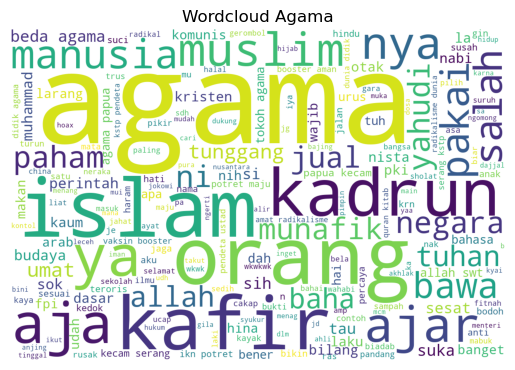

In [84]:
visualize_wordcloud('Wordcloud Agama', ' '.join(data[data['label'] == 'agama']['stemmed_words']))

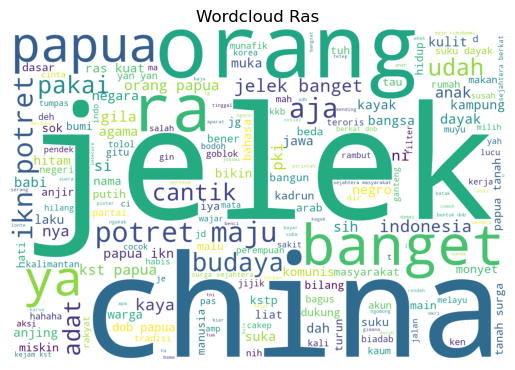

In [85]:
visualize_wordcloud('Wordcloud Ras', ' '.join(data[data['label'] == 'ras']['stemmed_words']))

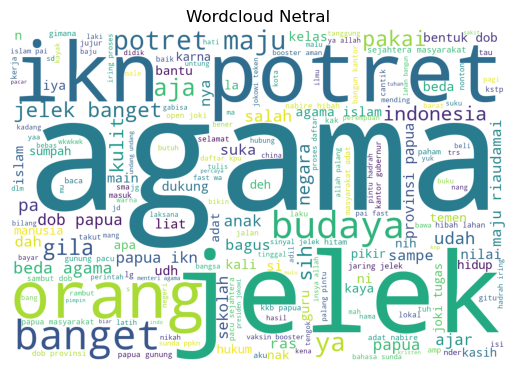

In [86]:
visualize_wordcloud('Wordcloud Netral', ' '.join(data[data['label'] == 'netral']['stemmed_words']))

In [87]:
data['length_after_filtered'] = data['tokenization'].apply(lambda x: len(x))
data.head()

,username,tweet,label,length,punctuation,urls,normed_tweet,stop_words_removed,stemmed_words,tokenization,length_after_filtered
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,netral,21,12,1,lingkunganmu sepertinya punya pemahaman kalau ...,lingkunganmu pemahaman anak punk tuh jelek y k...,lingkung paham anak punk tuh jelek y kesan git...,"[lingkung, paham, anak, punk, tuh, jelek, y, k...",13
1,__succiduous,Udah jelek brengsek pula,ras,4,0,0,udah jelek brengsek pula,udah jelek brengsek,udah jelek brengsek,"[udah, jelek, brengsek]",3
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,agama,17,18,1,lucunya penghuni negeri ini selalu di hiasi da...,lucunya penghuni negeri hiasi diwarnai politik...,lucu huni negeri hias warna politik identitas ...,"[lucu, huni, negeri, hias, warna, politik, ide...",11
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",ras,18,16,1,yang jelek miskin udah pasti bukan kristen tap...,jelek miskin udah kristen cantik pinter jago n...,jelek miskin udah kristen cantik pinter jago n...,"[jelek, miskin, udah, kristen, cantik, pinter,...",14
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,agama,8,1,0,mereka memanfaatkan kebodohan kadrun melalui b...,memanfaatkan kebodohan kadrun berita hoax,manfaat bodoh kadrun berita hoax,"[manfaat, bodoh, kadrun, berita, hoax]",5


## Bag of Words 
vectorization

In [88]:
columns_bag_of_words = list(set_stemmed_words)

In [89]:
bag_of_words = pd.DataFrame(0, index=range(len(data)), columns=columns_bag_of_words)

In [90]:
bag_of_words.insert(0, 'tokens', data['tokenization'])

In [91]:
bag_of_words.insert(1, 'labels', data['label'])

In [92]:
bag_of_words

,tokens,labels,macai,akidah,basarirsin,ini,hehhh,navy,terus,bener,...,knapa,wajar,kira,titik,syara,bngt,pendek,prototype,nyaman,cover
0,"[lingkung, paham, anak, punk, tuh, jelek, y, k...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[udah, jelek, brengsek]",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[lucu, huni, negeri, hias, warna, politik, ide...",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[jelek, miskin, udah, kristen, cantik, pinter,...",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[manfaat, bodoh, kadrun, berita, hoax]",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,"[undang, tpi, ramal, prediksi, tongkat, camat,...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,"[ajar, orang, china, hidup, numpang, pelit, ko...",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1936,"[paham, wahabi, rebak, paham, agama, tekstual,...",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1937,"[hidup, negara, pancasila, mengplementasikan, ...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
for i, tweet in enumerate(bag_of_words['tokens'].values):
	for word in set_stemmed_words:
		if word in tweet:
			bag_of_words.at[i, word] += 1

In [94]:
bag_of_words.head()

,tokens,labels,macai,akidah,basarirsin,ini,hehhh,navy,terus,bener,...,knapa,wajar,kira,titik,syara,bngt,pendek,prototype,nyaman,cover
0,"[lingkung, paham, anak, punk, tuh, jelek, y, k...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[udah, jelek, brengsek]",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[lucu, huni, negeri, hias, warna, politik, ide...",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[jelek, miskin, udah, kristen, cantik, pinter,...",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[manfaat, bodoh, kadrun, berita, hoax]",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
bag_of_words

,tokens,labels,macai,akidah,basarirsin,ini,hehhh,navy,terus,bener,...,knapa,wajar,kira,titik,syara,bngt,pendek,prototype,nyaman,cover
0,"[lingkung, paham, anak, punk, tuh, jelek, y, k...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[udah, jelek, brengsek]",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[lucu, huni, negeri, hias, warna, politik, ide...",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[jelek, miskin, udah, kristen, cantik, pinter,...",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[manfaat, bodoh, kadrun, berita, hoax]",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,"[undang, tpi, ramal, prediksi, tongkat, camat,...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,"[ajar, orang, china, hidup, numpang, pelit, ko...",ras,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1936,"[paham, wahabi, rebak, paham, agama, tekstual,...",agama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1937,"[hidup, negara, pancasila, mengplementasikan, ...",netral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split 

In [96]:
y = bag_of_words['labels']
X = bag_of_words.drop(['labels','tokens'],axis=1) 

In [97]:
def train_test_split(X, y, test_size):
	indices = np.arange(X.shape[0])
	np.random.shuffle(indices)

	test_count = int(test_size * X.shape[0])
	test = indices[:test_count]
	train = indices[test_count:]

	X_train, y_train = X.iloc[train], y.iloc[train]
	X_test, y_test = X.iloc[test], y.iloc[test]

	return X_train, y_train, X_test, y_test


In [98]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1552, 5059) (1552,) (387, 5059) (387,)


## Multinomial Naive Bayes
Naive bayes dont learn from mistakes just like what logistic regression did, since using Bag of Word is not enough, let's use TF IDF

In [100]:
class MultinomialNaiveBayes:
    def __init__(self, smoothing):
        """
        Initialize with optional smoothing parameter.
        smoothing: Laplace smoothing parameter (default is 1.0)
        """
        self.class_priors = None
        self.likelihoods = None
        self.classes = None
        self.smoothing = smoothing

    def fit(self, X, y):
        """
        Train the model by calculating priors and likelihoods.
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)  # Unique class labels
        n_classes = len(self.classes)

        # Initialize priors and likelihoods
        self.class_priors = np.zeros(n_classes, dtype=np.float64)
        self.likelihoods = np.zeros((n_classes, n_features), dtype=np.float64)

        # Calculate priors and likelihoods for each class
        for idx, cls in enumerate(self.classes):
            X_cls = X[y == cls]  # Filter rows belonging to class `cls`
            self.class_priors[idx] = X_cls.shape[0] / n_samples  # P(y)
            # Laplace smoothing: Add 1 to the word counts and sum of counts + smoothing
            self.likelihoods[idx, :] = (X_cls.sum(axis=0) + self.smoothing) / (X_cls.sum() + self.smoothing * n_features)  # P(x|y)
    
    def predict(self, X):
        """
        Predict the class labels for input data.
        """
        log_priors = np.log(self.class_priors)  # log(P(y))
        log_likelihoods = np.log(self.likelihoods)  # log(P(x|y))

        # Compute log-posterior for each class
        log_posteriors = X @ log_likelihoods.T + log_priors  # X * log(P(x|y)) + log(P(y))
        return self.classes[np.argmax(log_posteriors, axis=1)]


In [101]:
model = MultinomialNaiveBayes(smoothing=5.0)

In [102]:
model.fit(X_train, y_train)

In [103]:
y_pred = model.predict(X_test)
sum(y_pred == y_test) / len(y_test) * 100

62.7906976744186

## TF - IDF

In [104]:
import math

def compute_tf(data):
	tf = []
	for doc in data:
		term_count = len(doc)
		tf_doc = {term: doc.count(term) / term_count for term in doc}
		tf.append(tf_doc)
	return tf

def compute_idf(data):
	total_docs = len(data)
	all_terms = set_stemmed_words
	idf = {}
	for term in all_terms:
		doc_count = sum(1 for doc in data if term in doc)
		idf[term] = math.log(total_docs / (1 + doc_count))
	return idf

def compute_tfidf(tf, idf):
	tfidf = []
	for tf_doc in tf:
		tfidf_doc = {term: tf_doc[term] * idf[term] for term in tf_doc}
		tfidf.append(tfidf_doc)
	return tfidf
		

In [105]:
tf = compute_tf(data['tokenization'])
idf = compute_idf(data['tokenization'])
tfidf = compute_tfidf(tf, idf)

In [106]:
tf

[{'lingkung': 0.07692307692307693,
  'paham': 0.07692307692307693,
  'anak': 0.07692307692307693,
  'punk': 0.07692307692307693,
  'tuh': 0.07692307692307693,
  'jelek': 0.07692307692307693,
  'y': 0.07692307692307693,
  'kesan': 0.07692307692307693,
  'gitu': 0.07692307692307693,
  'capek': 0.07692307692307693,
  'ya': 0.07692307692307693,
  'liat': 0.07692307692307693,
  'o': 0.07692307692307693},
 {'udah': 0.3333333333333333,
  'jelek': 0.3333333333333333,
  'brengsek': 0.3333333333333333},
 {'lucu': 0.09090909090909091,
  'huni': 0.09090909090909091,
  'negeri': 0.09090909090909091,
  'hias': 0.09090909090909091,
  'warna': 0.09090909090909091,
  'politik': 0.09090909090909091,
  'identitas': 0.09090909090909091,
  'kesan': 0.09090909090909091,
  'mabok': 0.09090909090909091,
  'agama': 0.09090909090909091,
  'ka': 0.09090909090909091},
 {'jelek': 0.07142857142857142,
  'miskin': 0.07142857142857142,
  'udah': 0.14285714285714285,
  'kristen': 0.07142857142857142,
  'cantik': 0.071

In [107]:
idf

{'macai': 6.876780474682707,
 'akidah': 6.471315366574542,
 'basarirsin': 6.876780474682707,
 'ini': 6.876780474682707,
 'hehhh': 6.876780474682707,
 'navy': 6.876780474682707,
 'terus': 6.183633294122761,
 'bener': 4.5254052175192285,
 'dn': 5.9604897428085515,
 'wjuliia': 6.876780474682707,
 'kuala': 6.876780474682707,
 'ngecek': 6.471315366574542,
 'anyingggg': 6.876780474682707,
 'khas': 5.9604897428085515,
 'faham': 5.778168186014597,
 'bersin': 6.876780474682707,
 'lokal': 5.172032382444281,
 'la': 4.5254052175192285,
 'hny': 6.876780474682707,
 'duo': 6.876780474682707,
 'min': 5.9604897428085515,
 'ttp': 6.471315366574542,
 'politis': 6.876780474682707,
 'my': 5.778168186014597,
 'kkb': 4.434433439313502,
 'when': 6.876780474682707,
 'sebel': 6.471315366574542,
 'amiiinnn': 6.876780474682707,
 'krisis': 6.876780474682707,
 'lagimuterin': 6.876780474682707,
 'muhammad': 5.085021005454651,
 'putus': 5.778168186014597,
 'masu': 6.876780474682707,
 'dosa': 5.778168186014597,
 'pany

In [108]:
len(tfidf)

1939

next is vectorizing tf idf, which means turning it into dataframe

In [109]:
tfidf_df = pd.DataFrame.from_dict(tfidf)

In [110]:
tfidf_df.fillna(0, inplace=True)
tfidf_df.insert(0, 'labels', data['label'])
tfidf_df.insert(1, 'tokens', data['tokenization'])

In [111]:
tfidf_df.head()

,labels,tokens,lingkung,paham,anak,punk,tuh,jelek,y,kesan,...,camat,donatur,beliin,numpang,pelit,kontribusi,rebak,tekstual,mengplementasikan,rusa
0,netral,"[lingkung, paham, anak, punk, tuh, jelek, y, k...",0.475664,0.325979,0.291211,0.528983,0.334696,0.152514,0.432617,0.497793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ras,"[udah, jelek, brengsek]",0.000000,0.000000,0.000000,0.000000,0.000000,0.660893,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,agama,"[lucu, huni, negeri, hias, warna, politik, ide...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.588301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ras,"[jelek, miskin, udah, kristen, cantik, pinter,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.141620,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,agama,"[manfaat, bodoh, kadrun, berita, hoax]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
y = tfidf_df['labels']
X = tfidf_df.drop(['labels','tokens'],axis=1)

In [113]:
y.shape, X.shape

((1939,), (1939, 5059))

In [114]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1552, 5059) (1552,) (387, 5059) (387,)


In [116]:
model = MultinomialNaiveBayes(smoothing=1.0)

In [117]:
model.fit(X_train, y_train)

In [118]:
y_pred = model.predict(X_test)

In [119]:
sum(y_pred == y_test) / len(y_test) * 100

62.01550387596899